## Análise dos Casos de Hanseníase no Brasil (2000 - 2025)
---

```
Esse projeto consiste em analisar os casos de Hanseníase no Brasil, com dados disponíveis no DATASUS.

O dataset utilizado foi o de Casos de Hanseníase - Desde 2001 (SINAN), por ano de diagnóstico.

```

---
**Referências:**

Dataset utilizado: [DATASUS](https://datasus.saude.gov.br/acesso-a-informacao/casos-de-hanseniase-desde-2001-sinan/)

Universidade Federal de Juiz de Fora: [UFJF](https://www2.ufjf.br/noticias/2024/01/30/janeiro-roxo-brasil-e-o-2o-pais-com-mais-casos-de-hanseniase/)

Sobre a Hanseníase: [GOV.BR](https://www.gov.br/saude/pt-br/assuntos/saude-de-a-a-z/h/hanseniase)

### Contexto

```
A Hanseníase é uma doença muito antiga, que foi por muito tempo estigmatizada vista até como maldição ou castigo divino. Pessoas que tinham a doença foram marginalizadas e mesmo em dias recentes, ainda existe desinformação sobre a doença e preconceito baseado nela.

No Brasil, o termo "lepra" foi substituído oficialmente pelo termo "hanseníase" em documentos oficiais em 1995, mudança motivada pelo caráter discriminatório e estigmatizante do termo antigo.

O nome escolhido foi em homenagem a Gerhard Armauer Hansen, que descobriu em 1873, o bacilo causador da doença (Mycobacterium leprae).

Apesar dos avanços, a hanseníase ainda é um problema de saúde pública no Brasil. O país é o 2º no mundo com mais casos de hanseníase.

Desde a década de 1980 o Brasil possui iniciativas institucionais que alteram a estratégia de cuidado de pessoas acometidas pela doença, como o fechamento dos hospitais colônia.
```



### Objetivos da Análise:

1- Analisar o comportamento da doença ao longos dos anos, desde o período que temos documentado

2- Observar possíveis características de pessoas com maior taxa de diagnóstico da doença

3- Entender o porquê o Brasil ainda ocupa o 2º lugar com o maior número de casos de hanseníase

## Análise do número de casos por UF

### Importando Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

### Análise dos Dados

In [ ]:
# importando dataset
df = pd.read_csv('data/ano_uf_hanseniase.csv', encoding='latin1', sep=';', skiprows=3, skipfooter=18, engine='python')
df.head()

,Ano Diagnóstico,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,SP,PR,SC,RS,MS,MT,GO,DF,IG,Total
0,<1975,10,-,1,-,21,-,2,11,8,...,21,6,1,4,1,10,23,1,-,215
1,1975,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
2,1976,1,-,-,-,3,-,-,1,-,...,-,-,-,-,-,-,-,-,-,8
3,1977,1,-,-,-,-,-,1,-,-,...,-,-,-,-,-,1,-,-,-,5
4,1978,1,-,-,-,1,-,-,-,-,...,-,-,-,-,-,-,-,-,-,6


In [65]:
# renomeando a coluna para facilitar as análises
df.rename(columns={'Ano Diagnóstico' : 'ano_diagnostico'}, inplace = True)
df.head()

,ano_diagnostico,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,SP,PR,SC,RS,MS,MT,GO,DF,IG,Total
0,<1975,10,-,1,-,21,-,2,11,8,...,21,6,1,4,1,10,23,1,-,215
1,1975,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
2,1976,1,-,-,-,3,-,-,1,-,...,-,-,-,-,-,-,-,-,-,8
3,1977,1,-,-,-,-,-,1,-,-,...,-,-,-,-,-,1,-,-,-,5
4,1978,1,-,-,-,1,-,-,-,-,...,-,-,-,-,-,-,-,-,-,6


In [66]:
# filtrando os dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns=['IG', 'Total'])
    .replace('-', 0)
)
df.head()

,ano_diagnostico,RO,AC,AM,RR,PA,AP,TO,MA,PI,...,ES,RJ,SP,PR,SC,RS,MS,MT,GO,DF
26,2000,45,0,11,10,226,3,206,316,108,...,50,170,299,115,11,29,14,291,184,22
27,2001,1292,443,1464,355,6029,152,1353,5248,1885,...,1562,3282,3570,1753,212,223,623,3939,3353,359
28,2002,1364,398,1605,372,6748,197,1250,5742,1797,...,1824,3626,3502,1934,267,281,702,3942,3894,401
29,2003,1572,465,1315,373,7053,245,1409,5769,2070,...,1915,3519,3521,1990,293,266,788,4335,4029,384
30,2004,1491,364,1251,345,6893,217,1487,6119,1932,...,1697,3299,3225,2120,291,265,793,3923,3999,325


In [67]:
# transformar as colunas UF em uma única coluna
df_long = df.melt(id_vars='ano_diagnostico', 
                  var_name='UF', 
                  value_name='casos')

In [68]:
# converter os casos para tipo numérico
df_long['casos'] = pd.to_numeric(df_long['casos'], errors='coerce')

In [69]:
# agrupar por UF e somar casos
df_total = df_long.groupby('UF')['casos'].sum().reset_index()

In [70]:
# ordenar do maior para o menor
df_total.sort_values(by='casos', ascending=False)

,UF,casos
9,MA,110596
13,PA,106592
12,MT,98956
15,PE,76958
4,BA,72215
8,GO,60392
5,CE,56493
25,SP,54167
10,MG,49361
18,RJ,46005


### Visualização

Text(0, 0.5, 'Número total de casos')

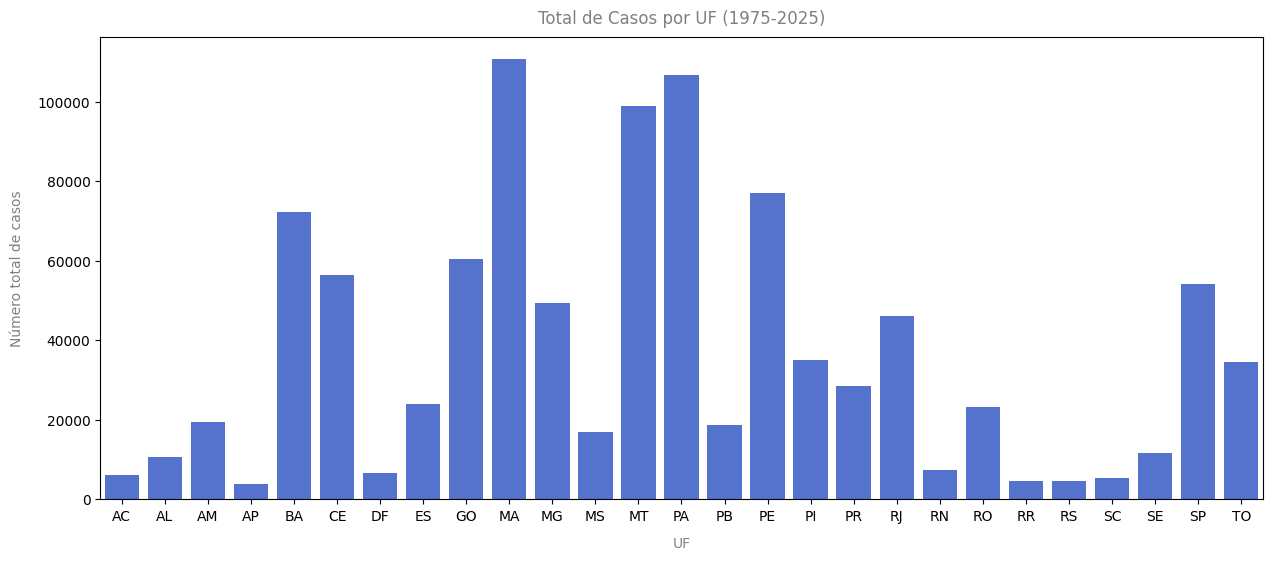

In [71]:
# visualização total de casos por uf
plt.figure(figsize=(15,6))
sns.barplot(data=df_total, x='UF', y='casos', color='royalblue')

plt.title('Total de Casos por UF (1975-2025)', pad=10, color='grey')
plt.xlabel('UF', labelpad=10, color='grey')
plt.ylabel('Número total de casos', labelpad=10, color='grey')

A maior concentração do total de casos de hanseníase está no estado do Maranhão, seguido por Pará e Mato Grosso.

In [72]:
# agrupar por ano e somar os casos
df_total = df_long.groupby('ano_diagnostico')['casos'].sum().reset_index()

# ordenar do maior para o menor
df_total.sort_values(by='ano_diagnostico', ascending=True)

# garante que os anos estão como números inteiros
df_total['ano_diagnostico'] = df_total['ano_diagnostico'].astype(int)

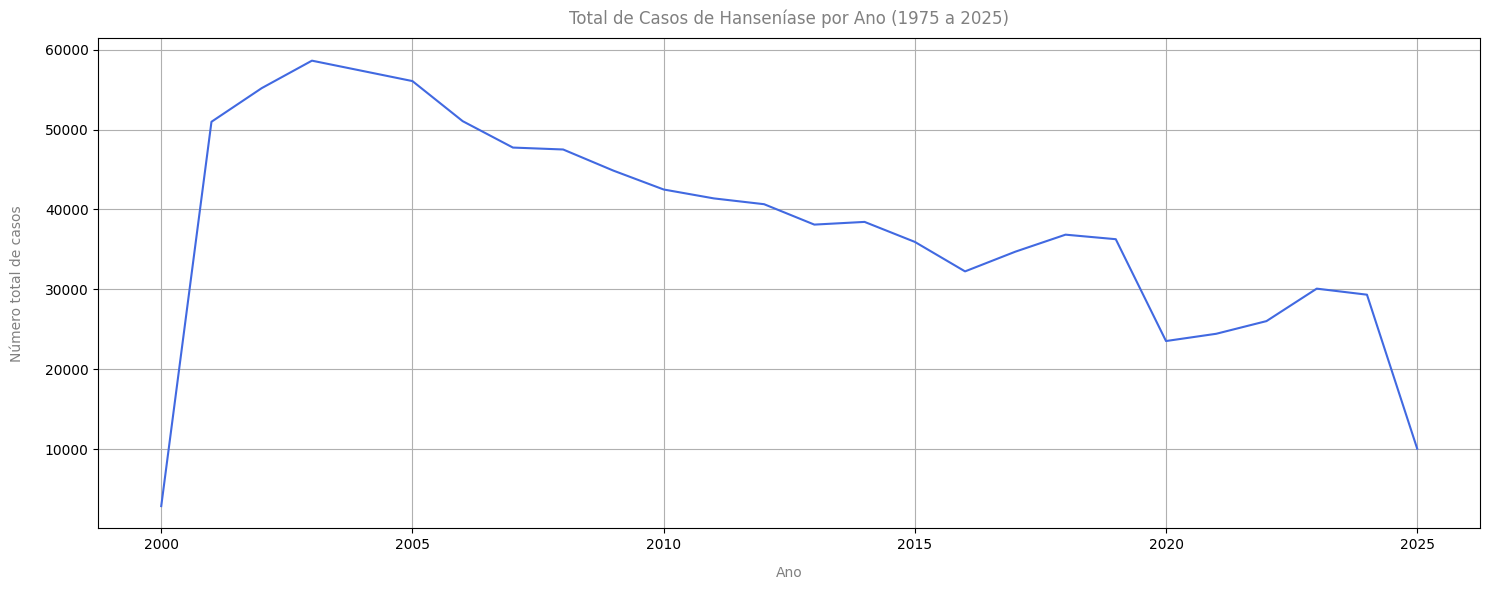

In [73]:
# visualização casos por ano
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_total, x='ano_diagnostico', y='casos', color='royalblue')

plt.title('Total de Casos de Hanseníase por Ano (1975 a 2025)', pad=10, color='grey')
plt.xlabel('Ano', labelpad=10, color='grey')
plt.ylabel('Número total de casos', labelpad=15, color='grey')
plt.grid(True)

# Eixo X com anos de 5 em 5
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()

Em 2001 a doença se encontrava no auge do número de casos, evoluindo com queda progressivas ao longo dos anos, mas com uma queda realmente importante em 2024.

## Análise do número de casos por Faixa Etária

In [114]:
# carregando dataset
df = pd.read_csv('data/faixa_etaria.csv'
                 ,encoding='latin1'
                 , sep=';'
                 , skiprows=3, skipfooter=18, engine='python')
df.head()

,Ano Diagnóstico,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Total
0,<1975,50,2,7,10,13,30,31,23,23,17,6,3,215
1,1975,-,-,-,-,-,1,-,1,-,-,-,-,2
2,1976,5,-,-,-,-,3,-,-,-,-,-,-,8
3,1977,-,-,-,-,-,3,1,1,-,-,-,-,5
4,1978,-,1,1,-,-,1,1,-,-,-,-,2,6


In [115]:
# renomeando colunas
df.rename(columns={
    'Ano Diagnóstico' : 'ano_diagnostico', 
    'Menor 1 ano' : '< 1 ano', 
    '1 a 4 anos' : '1-4',
    '5 a 9 anos' : '5-9',
    '10 a 14 anos' : '10-14',
    '15 a 19 anos' : '15-19',
    '20 a 29 anos' : '20-29',
    '30 a 39 anos' : '30-39',
    '40 a 49 anos' : '40-49',
    '50 a 59 anos' : '50-59',
    '60 a 69 anos' : '60-69',
    '70 a 79 anos' : '70-79',
    '80 anos e mais' : '80 ou mais'},  
    inplace=True)
df.head()

,ano_diagnostico,< 1 ano,1-4,5-9,10-14,15-19,20-29,30-39,40-49,50-59,60-69,70-79,80 ou mais,Total
0,<1975,50,2,7,10,13,30,31,23,23,17,6,3,215
1,1975,-,-,-,-,-,1,-,1,-,-,-,-,2
2,1976,5,-,-,-,-,3,-,-,-,-,-,-,8
3,1977,-,-,-,-,-,3,1,1,-,-,-,-,5
4,1978,-,1,1,-,-,1,1,-,-,-,-,2,6


In [116]:
# filtrando dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns='Total')
    .replace('-', 0)
)
df.head()

,ano_diagnostico,< 1 ano,1-4,5-9,10-14,15-19,20-29,30-39,40-49,50-59,60-69,70-79,80 ou mais
26,2000,0,7,77,156,227,583,484,531,381,258,116,29
27,2001,37,150,1076,2564,4005,9791,8556,9377,7144,5086,2470,759
28,2002,89,211,1161,2697,4147,10750,9476,10188,7805,5203,2706,799
29,2003,103,202,1210,2967,4757,11786,10093,10450,8120,5461,2680,842
30,2004,104,155,1322,2874,4375,11283,9657,10110,8346,5415,2851,882


In [117]:
# transforma as colunas idade em uma única coluna
df_long = df.melt(id_vars='ano_diagnostico', 
                  var_name='idade', 
                  value_name='casos')

In [122]:
# converter os casos para tipo numérico
df_long['casos'] = pd.to_numeric(df_long['casos'], errors='coerce')

# agrupar e somar os casos
df_total = df_long.groupby('idade')['casos'].sum().reset_index()

df_total.sort_values(by='casos', ascending=False)

,idade,casos
5,40-49,182695
7,50-59,170650
4,30-39,169209
3,20-29,149323
8,60-69,120707
9,70-79,61433
2,15-19,54570
1,10-14,41837
10,80 ou mais,20030
6,5-9,19565


Text(0, 0.5, 'Total de Casos')

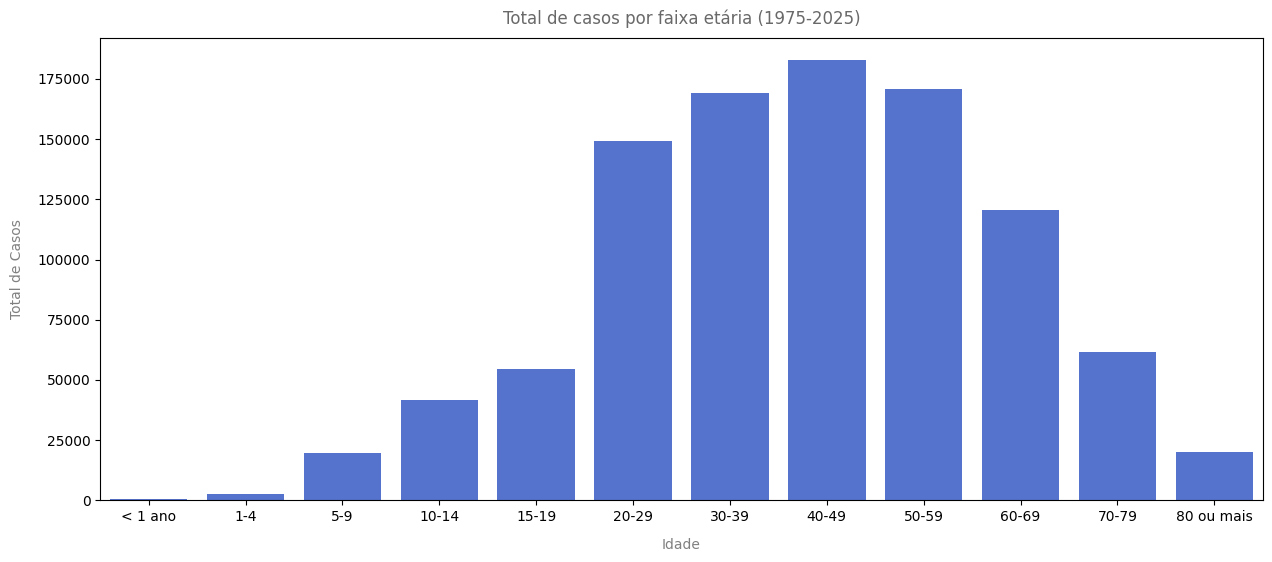

In [79]:
# visualização total de casos por faixa etária
ordem = ['< 1 ano', '1-4', '5-9', '10-14', '15-19', '20-29', 
         '30-39', '40-49', '50-59', '60-69', '70-79', '80 ou mais']

plt.figure(figsize=(15,6))
sns.barplot(data=df_total, x='idade', y='casos', order=ordem, color='royalblue')

plt.title('Total de casos por faixa etária (1975-2025)', pad=10, color='dimgrey')
plt.xlabel('Idade', labelpad=10, color='grey')
plt.ylabel('Total de Casos', labelpad=10, color='grey')

O pico de incidência está no grupo de 40-49 anos, seguido respectivamente por 50-59, 30-39 e 20-29 anos. Com queda progressiva a partir dos 60 anos de idade. Apresentando baixa incidência em crianças e adolescentes.

### Comparação do comportamento de diagnósticos ao longo do ano por faixa etária

In [80]:
# Função para agrupar faixas
def agrupar_faixa(idade):
    if idade in ['1-4', '5-9', '10-14', '15-19']:
        return '1-19 anos'
    elif idade in ['20-29', '30-39', '40-49']:
        return '20-49 anos'
    elif idade in ['50-59', '60-69', '70-79']:
        return '50-79 anos'
    else:
        return None 

# Aplicar
df_long['faixa_agrupada'] = df_long['idade'].apply(agrupar_faixa)

# Filtrar só faixas de interesse
df_faixas = df_long[df_long['faixa_agrupada'].notna()]

In [81]:
df_grouped = df_faixas.groupby(['ano_diagnostico', 'faixa_agrupada'], as_index=False)['casos'].sum()

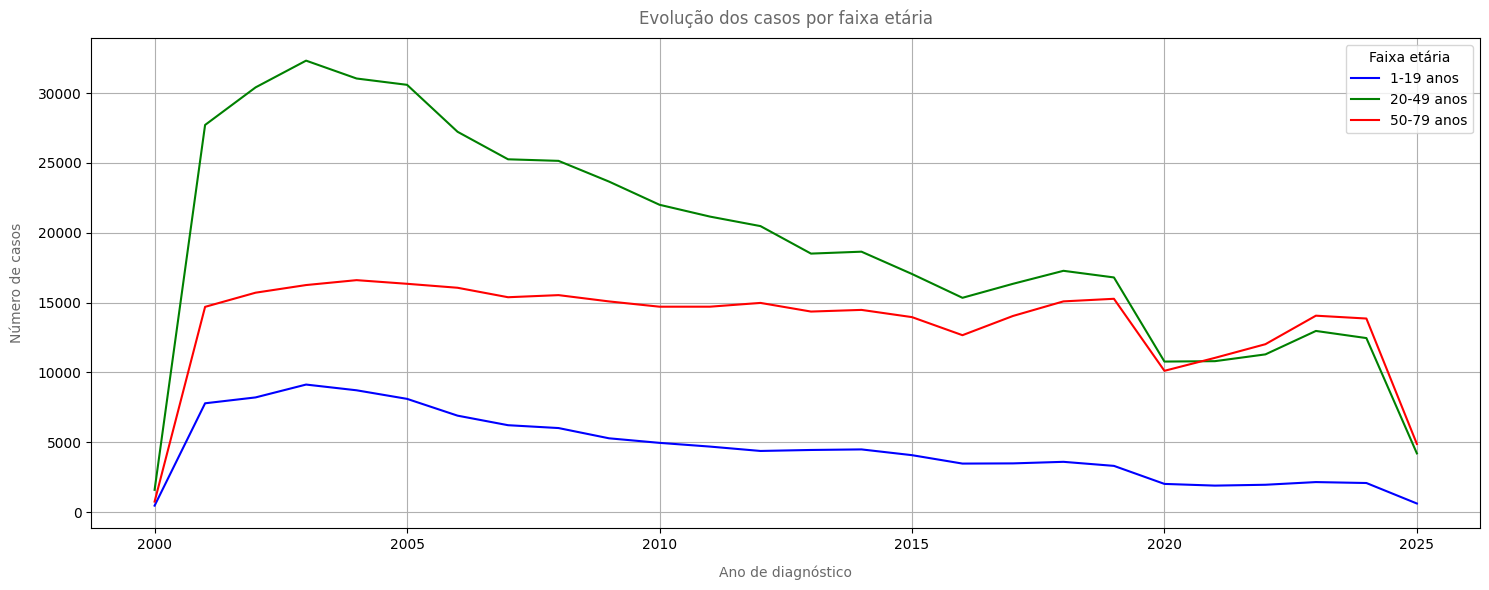

In [84]:
from statsmodels.nonparametric.smoothers_lowess import lowess

faixas = ['1-19 anos', '20-49 anos', '50-79 anos']
cores = ['blue', 'green', 'red']

plt.figure(figsize=(15, 6))

# Gráfico de linha original
sns.lineplot(data=df_grouped, x='ano_diagnostico', y='casos', hue='faixa_agrupada', palette=cores)

plt.title('Evolução dos casos por faixa etária', pad=10, color='dimgrey')
plt.xlabel('Ano de diagnóstico', labelpad=10, color='dimgrey')
plt.ylabel('Número de casos', labelpad=10, color='dimgrey')
plt.grid(True)
plt.legend(title='Faixa etária', loc='upper right')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))
plt.tight_layout()

A faixa de 1-19 anos apesar da incidência alta em meados dos anos 2000, evoluiu com redução progressiva ao longo dos anos. A faixa de 20-49 atingiu o maior pico do número de diagnósticos, sendo a faixa com maior número absoluto de casos, apresentando uma queda acentuada e contínua. Apresenta números elevados em comparação com a primeira faixa etária, e se mantém relativamente estável com uma queda suave.

Apesar da diferença do número de diagnósticos, todas as faixa se comportam de forma semelhante, com o pico ainda presente nos anos 2000, com queda progressiva ao longo dos anos. Isso pode indicar efeito das intervenções de saúde pública no país.

## Análise de casos pelo Grau de Incapacidade ao Diagnóstico

A hanseníase pode ser classificada pelo Grau de Incapacidade Física.

**Grau 0:** Sem incapacidades relacionadas à hanseníase nos olhos, mãos e pés. \
**Grau 1:** Diminuição ou perda de sensibilidade nos olhos, mãos e pés, podendo apresentar lagoftalmo, ectrópio, triquíase, opacidade corneana central ou acuidade visual.\
**Grau 2:** Presença de lesões visíveis e deformidades físicas nos olhos, mãos e pés, além de comprometimento neural. 

In [85]:
# importando dataset
df = pd.read_csv('data/graus_incapacidade.csv', encoding='latin1', sep=';', skiprows=3, skipfooter=18, engine='python')

In [86]:
# renomeando colunas para facilitar as análises
df.rename(columns={
    'Ano Diagnóstico' : 'ano_diagnostico', 
    'GRAU ZERO' : 'grau_0', 
    'GRAU I' : 'grau_1', 
    'GRAU II' : 'grau_2'}, 
    inplace=True)

In [87]:
# filtrando os dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns=['Em Branco', 'Não AVALIADO', 'Total'])
    .replace('-', 0)
)

In [88]:
# transformando a coluna grau de incapacidade em uma única coluna
df_long = df.melt(id_vars='ano_diagnostico', 
                  var_name='grau_incapacidade', 
                  value_name='casos')

In [89]:
# converter os casos para tipo numérico
df_long['casos'] = pd.to_numeric(df_long['casos'], errors='coerce')

# agrupar e somar os casos
df_total = df_long.groupby('grau_incapacidade')['casos'].sum().reset_index()
df_total

,grau_incapacidade,casos
0,grau_0,580794
1,grau_1,220240
2,grau_2,75915


Text(0, 0.5, 'Total de Casos')

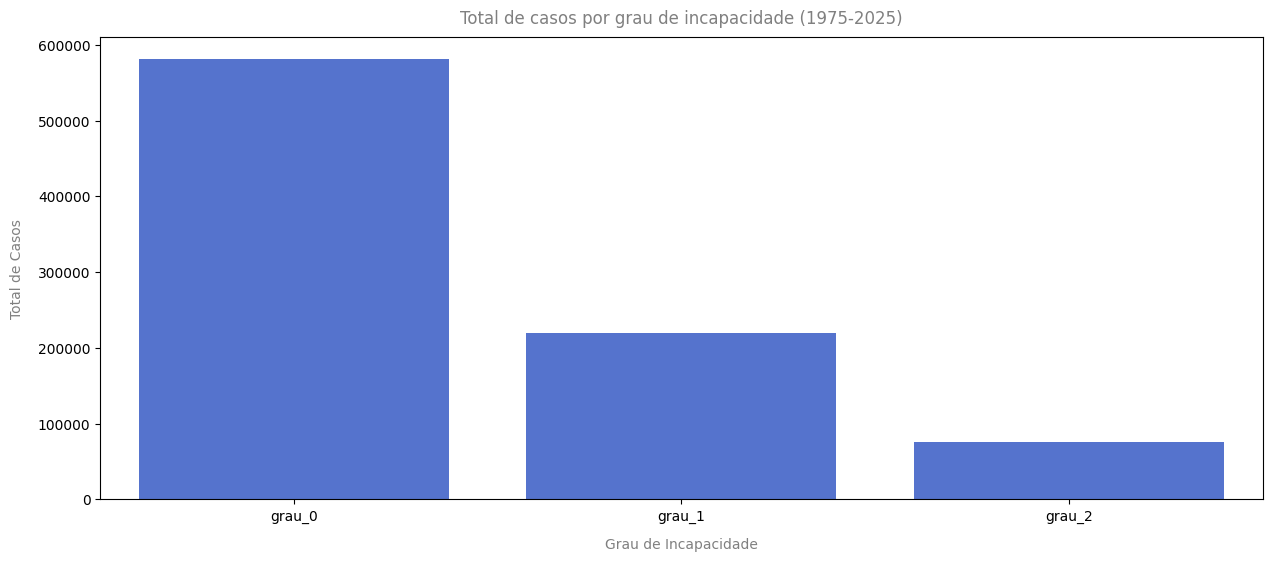

In [90]:
# visualização de total de casos por grau de incapacidade
plt.figure(figsize=(15,6))
sns.barplot(data=df_total, x='grau_incapacidade', y='casos', color='royalblue')

plt.title('Total de casos por grau de incapacidade (1975-2025)', pad=10, color='grey')
plt.xlabel('Grau de Incapacidade', labelpad=10, color='grey')
plt.ylabel('Total de Casos', labelpad=10, color='grey')

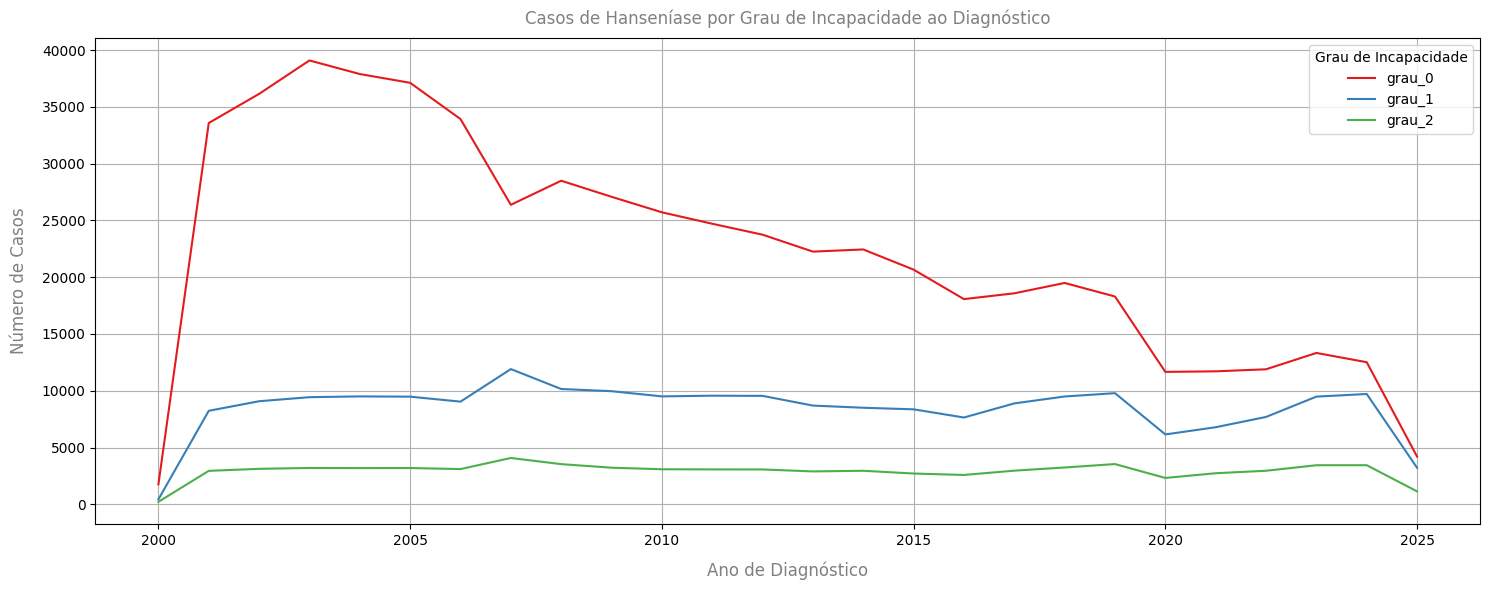

In [91]:

# visualização de casos por ano e grau de incapacidade
plt.figure(figsize=(15, 6))

sns.lineplot(
    data=df_long,
    x='ano_diagnostico',
    y='casos',
    hue='grau_incapacidade',
    palette='Set1'
)

plt.title('Casos de Hanseníase por Grau de Incapacidade ao Diagnóstico', pad=10, color='grey')
plt.xlabel('Ano de Diagnóstico', fontsize=12, labelpad=10, color='grey')
plt.ylabel('Número de Casos', fontsize=12, labelpad=10, color='grey')
plt.legend(title='Grau de Incapacidade', loc='upper right')
plt.grid(True)

# Eixo X com anos de 5 em 5
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()

## Análise de casos por sexo

In [92]:
# importando dataset
df = pd.read_csv('data/sexo.csv', encoding='latin1', sep=';', skiprows=3, skipfooter=18, engine='python')
df.tail()

,Ano Diagnóstico,Ignorado,Masculino,Feminino,Total
47,2021,3,14328,10106,24437
48,2022,-,15114,10908,26022
49,2023,-,16920,13166,30086
50,2024,1,16134,13195,29330
51,2025,-,5475,4565,10040


In [93]:
# renomenado colunas para facilitar análise
df.rename(columns={
    'Ano Diagnóstico' : 'ano_diagnostico', 
    'Masculino' : 'masculino', 
    'Feminino' : 'feminino'}, 
    inplace=True)

In [94]:
# filtrando dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns=['Ignorado', 'Total'])
    .replace('-', 0)
)

In [95]:
# transformando colunas de sexo em uma única coluna
df_long = pd.melt(
    df,
    id_vars=['ano_diagnostico'],
    value_vars=['masculino', 'feminino'],
    var_name='sexo',
    value_name='casos'
)

In [96]:
# somandos todos os casos por sexo
totais = df_long.groupby('sexo')['casos'].sum().reset_index()
totais

,sexo,casos
0,feminino,437288
1,masculino,555645


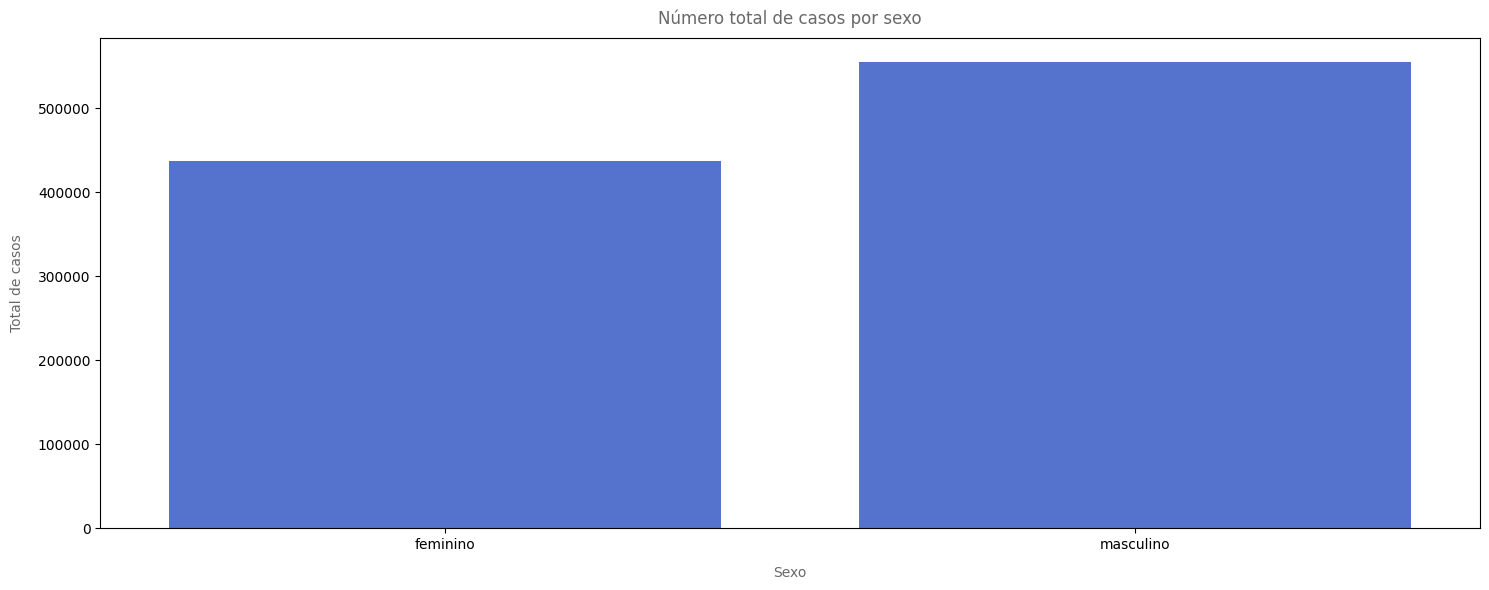

In [98]:
# visualização do total de casos por sexo
plt.figure(figsize=(15,6))
sns.barplot(data=totais, x='sexo', y='casos', color='royalblue')

plt.title('Número total de casos por sexo', pad=10, color='dimgrey')
plt.xlabel('Sexo', labelpad=10, color='dimgrey')
plt.ylabel('Total de casos', labelpad=10, color='dimgrey')

plt.tight_layout()

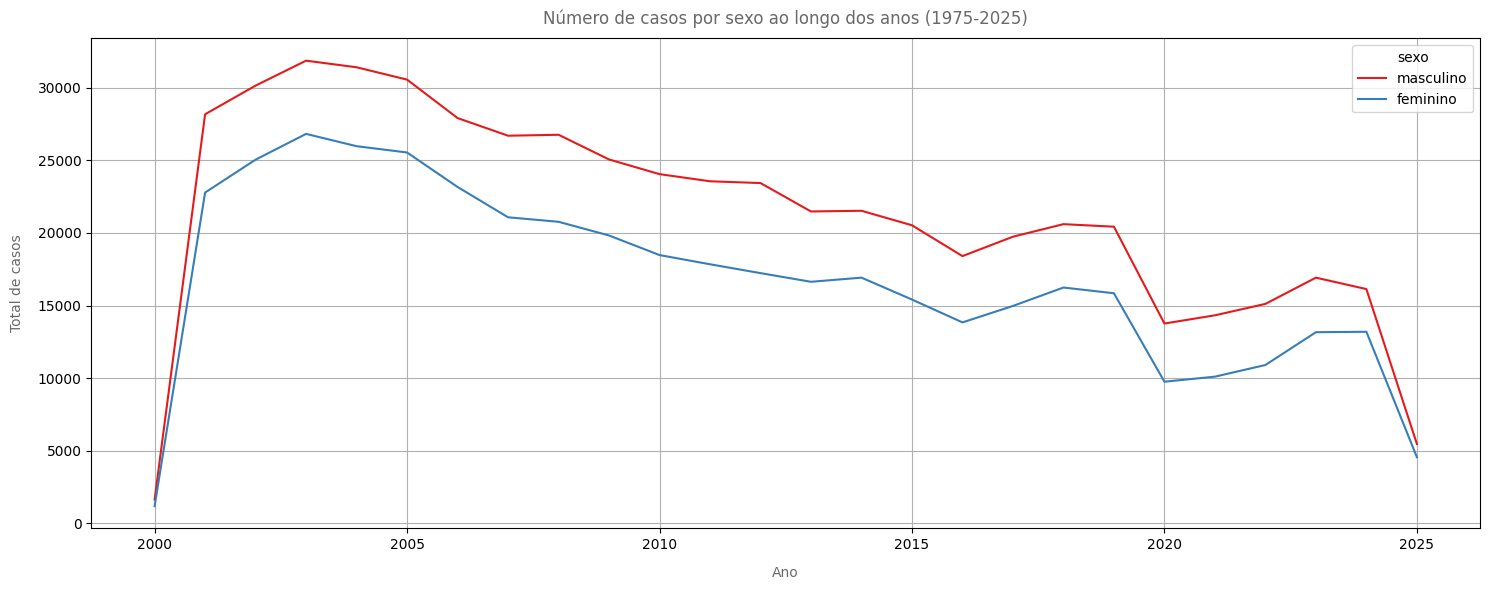

In [99]:
# visualização de caso por sexo ao longo dos anos
plt.figure(figsize=(15,6))
sns.lineplot(data=df_long, x='ano_diagnostico', y='casos', hue='sexo', palette='Set1')

plt.title('Número de casos por sexo ao longo dos anos (1975-2025)', pad=10, color='dimgrey')
plt.xlabel('Ano', labelpad=10, color='dimgrey')
plt.ylabel('Total de casos', labelpad=10, color='dimgrey')
plt.legend(title='sexo', loc='upper right')
plt.grid(True)

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.tight_layout()

Na questão de sexo, a doença se comporta de forma muito parecida ao longo dos anos, mesmo o sexo masculino sendo o maior acometido.

## Análise de casos por raça

In [100]:
# importando dataset
df = pd.read_csv('data/raça.csv', skiprows=3, skipfooter=18, sep=';', encoding='latin1', engine='python')

In [101]:
# renomeando colunas para facilitar análise
df.rename(columns={
    'Ano Diagnóstico' : 'ano_diagnostico', 
    'Branca' : 'branca', 
    'Preta' : 'preta', 
    'Amarela' : 'amarela', 
    'Parda' : 'parda', 
    'Indigena' : 'indigena'}, 
    inplace=True
)

In [102]:
# filtrando dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns=['Ign/Branco', 'Total'])
    .replace('-', 0)
)

In [103]:
# criando coluna única para raça
df_long = pd.melt(
    df,
    id_vars=['ano_diagnostico'],
    value_vars=['branca', 'preta', 'amarela', 'parda', 'indigena'],
    var_name='raca',
    value_name='casos'
)

In [104]:
# converter os casos para tipo numérico
df_long['casos'] = pd.to_numeric(df_long['casos'], errors='coerce')

# agrupando por raça e somandos casos
total_por_raca = df_long.groupby('raca')['casos'].sum().reset_index()

# ordenando do maior para o menor
total_por_raca = total_por_raca.sort_values(by='casos', ascending=False)

total_por_raca

,raca,casos
3,parda,491230
1,branca,258480
4,preta,120101
0,amarela,11835
2,indigena,3796


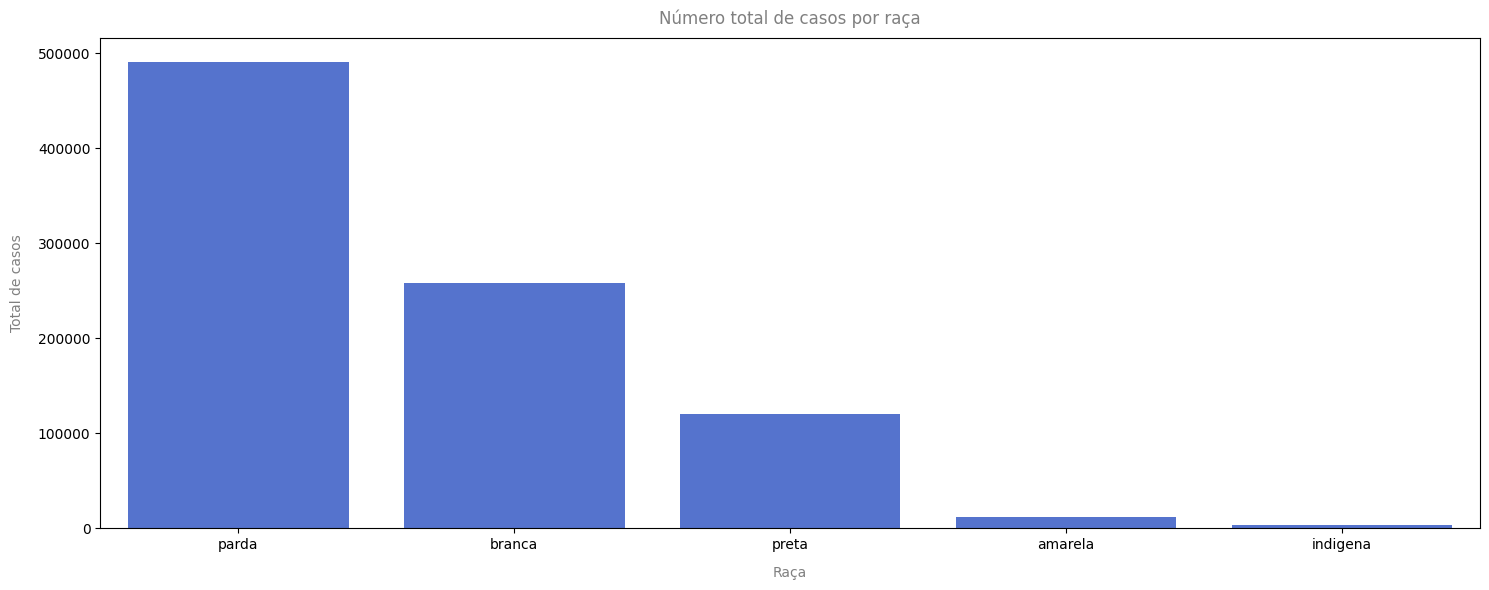

In [105]:
# visualização do total de casos por raça (1975-2025)
plt.figure(figsize=(15,6))
sns.barplot(data=total_por_raca, x='raca', y='casos', color='royalblue')

plt.title('Número total de casos por raça', pad=10, color='grey')
plt.xlabel('Raça', labelpad=10, color='grey')
plt.ylabel('Total de casos', labelpad=10, color='grey')

plt.tight_layout()

Os casos da doença em pessoas pardas é amplamente superior ao de outras raças.

## Analise de casos por escolaridade

In [106]:
# importando dataset
df = pd.read_csv('data/escolaridade.csv', encoding='latin1', sep=';', skiprows=3, skipfooter=18, engine='python')

In [107]:
# renomenado colunas para facilitar análise
df.rename(columns={
    'Ano Diagnóstico' : 'ano_diagnostico', 
    'Analfabeto' : 'analfabeto'}, 
    inplace=True)

In [108]:
# filtrando dados
df = (
    df[
        (df['ano_diagnostico'] != '<1975') & 
        (pd.to_numeric(df['ano_diagnostico'], errors='coerce') >= 2000)
    ]
    .drop(columns=['Não se aplica', 'Total', 'Ign/Branco'])
    .replace('-', 0)
)

In [109]:
# ajustando colunas por escolaridade
colunas_escolaridade = df.columns.drop('ano_diagnostico')
df[colunas_escolaridade] = df[colunas_escolaridade].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

df['fundamental_incompleto'] = df['1ª a 4ª série incompleta do EF'] + df['5ª a 8ª série incompleta do EF']
df['fundamental_completo'] = df['4ª série completa do EF'] + df['Ensino fundamental completo']
df['medio_incompleto'] = df['Ensino médio incompleto']
df['medio_completo'] = df['Ensino médio completo']
df['superior_incompleto'] = df['Educação superior incompleta']
df['superior_completo'] = df['Educação superior completa']

In [110]:
# mantém o ano e as colunas agrupadas em formato "tidy"
df_long = pd.melt(
    df,
    id_vars=['ano_diagnostico'],
    value_vars=[
        'analfabeto',
        'fundamental_incompleto',
        'fundamental_completo',
        'medio_incompleto',
        'medio_completo',
        'superior_incompleto',
        'superior_completo'
    ],
    var_name='escolaridade',
    value_name='casos'
)

In [111]:
# Corrigir ano para inteiro
df_long['ano_diagnostico'] = df_long['ano_diagnostico'].astype(int)
df_long['ano_diagnostico'] = df_long['ano_diagnostico'].astype(int)

In [112]:
# agrupando por escolaridade e somando casos
total_escolaridade = df_long.groupby('escolaridade')['casos'].sum().reset_index()
total_escolaridade

,escolaridade,casos
0,analfabeto,112245
1,fundamental_completo,97898
2,fundamental_incompleto,411588
3,medio_completo,75756
4,medio_incompleto,85865
5,superior_completo,31773
6,superior_incompleto,8370


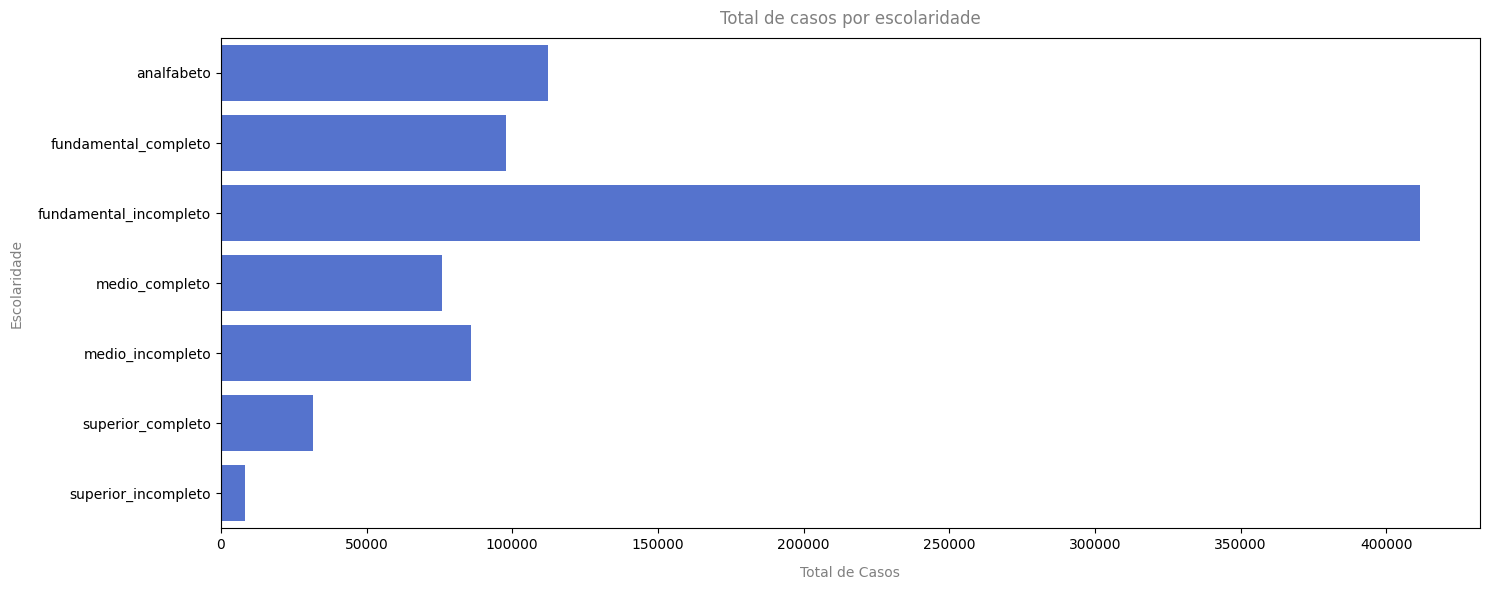

In [113]:
# visualização total de casos por escolaridade
plt.figure(figsize=(15, 6))
sns.barplot(data=total_escolaridade, x='casos', y='escolaridade', color='royalblue')

plt.title('Total de casos por escolaridade', pad=10, color='grey')
plt.xlabel('Total de Casos', labelpad=10, color='grey')
plt.ylabel('Escolaridade', labelpad=10, color='grey')

plt.tight_layout()

Nota-se a diferença importante de dianósticos em pessoas que possuem ensino fundamental incompleto. E como também pessoas com nível superior completo contemplam o menor número de diagnósticos.

## Análise de correlação entre raça, escolaridade e sexo

Para analisar a possível correlação entre as variáveis e o diagnóstico de hanseníase, utilizei a correlação de Spearman, que avalia a força e a direção da relação monotônica entre duas variáveis, calculando o coeficiente de correlação de Spearman e o valor-p da significância.

In [58]:
# importando datasets
df_raca = pd.read_csv('data/processed/casos_por_raca.csv')
df_escolaridade = pd.read_csv('data/processed/casos_por_escolaridade.csv')
df_sexo = pd.read_csv('data/processed/casos_por_sexo.csv')
df_faixa_etaria = pd.read_csv('data/processed/casos_por_faixa_etaria.csv')
df_uf = pd.read_csv('data/processed/casos_por_uf.csv')


In [59]:
# trasnformando categorias em códigos numéricos
df_raca['raca_cod'] = df_raca['raca'].astype('category').cat.codes
df_sexo['sexo_cod'] = df_sexo['sexo'].astype('category').cat.codes
df_escolaridade['escolaridade_cod'] = df_escolaridade['escolaridade'].astype('category').cat.codes


In [60]:
from scipy.stats import spearmanr

# correlação de Spearman (boa para ordinais ou categorias transformadas)
rho_raca, p_raca = spearmanr(df_raca['raca_cod'], df_raca['casos'])
rho_esc, p_esc = spearmanr(df_escolaridade['escolaridade'].astype('category').cat.codes, df_escolaridade['casos'])
rho_sexo, p_sexo = spearmanr(df_sexo['sexo'].astype('category').cat.codes, df_sexo['casos'])

print(f'Correlação raça x casos: rho={rho_raca:.2f}, p={p_raca:.3f}')
print(f'Correlação escolaridade x casos: rho={rho_esc:.2f}, p={p_esc:.3f}')
print(f'Correlação sexo x casos: rho={rho_sexo:.2f}, p={p_sexo:.3f}')


Correlação raça x casos: rho=0.31, p=0.000
Correlação escolaridade x casos: rho=-0.55, p=0.000
Correlação sexo x casos: rho=0.35, p=0.012


### Interpretação:

**Correlação Raça x Casos:**

```rho=0.14``` → correlação fraca e positiva

```p=0.025``` → estatisticamente significativa (p < 0.05)

Existe uma correlação positiva fraca, mas estatisticamente significativa, entre o grupo racial e o número de casos de hanseníase. Ou seja, alguns grupos raciais aparecem mais nos dados, mas a força da relação é pequena. Pode refletir desigualdades sociais, mas são necessários mais dados para essa conclusão.

**Correlação Escolaridade x Casos:**

```rho=-0.28``` → correlação moderada e negativa

```p=0.000``` → estatisticamente altamente significativa

Existe uma correlação negativa e estatisticamente significativa entre escolaridade e número de casos. Isso significa que quanto menor o nível de escolaridade, maior a incidência de hanseníase. Esse achado pode refletir vulnerabilidade social, menor acesso à saúde, ou falta de informação sobre prevenção.

**Correlação Sexo x Casos:**

```rho=0.14``` → correlação fraca e positiva

```p=0.164``` → não estatisticamente significativa

Embora o valor de rho seja parecido com o da raça, a correlação entre sexo e número de casos não é estatisticamente significativa. Ou seja, os dados não indicam diferença relevante entre homens e mulheres na incidência de hanseníase.

### Visualizações para apoio de análise

Para analisar como os casos de hanseníase estão distribuídos entre os diferentes grupos de cada categoria, utilizei um boxplot.

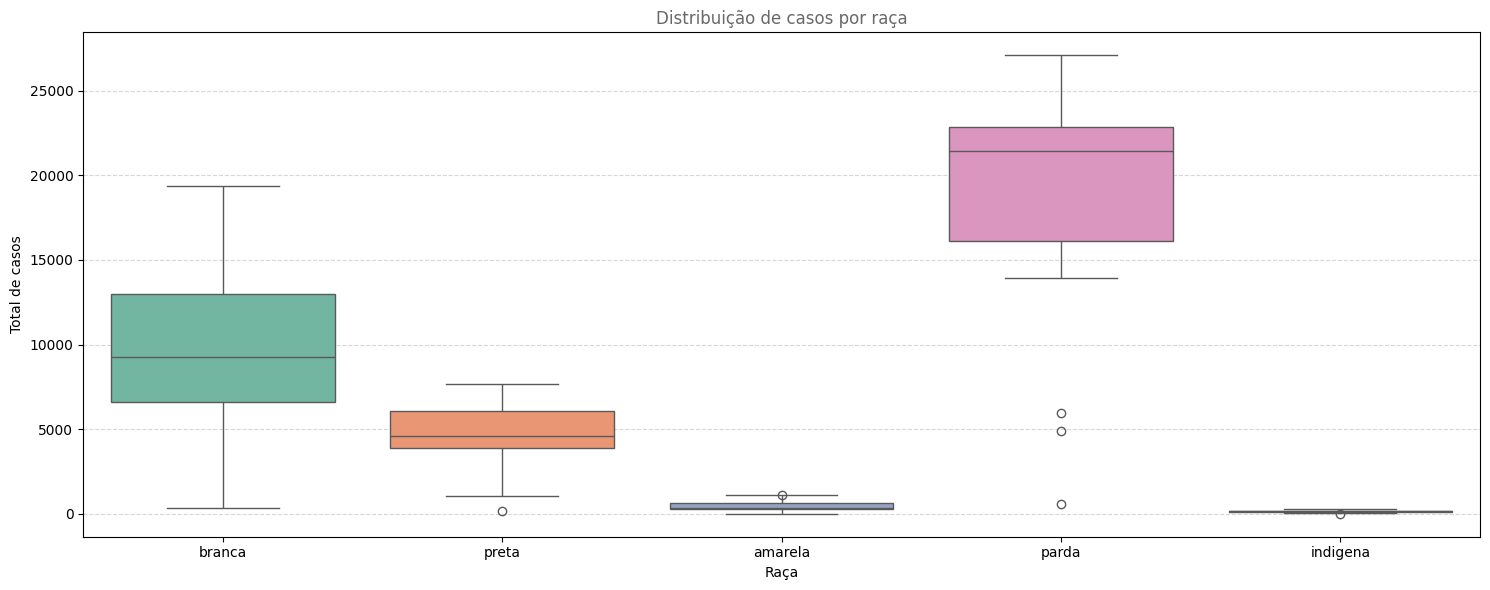

In [61]:
plt.figure(figsize=(15,6))

sns.boxplot(data=df_raca, x='raca', y='casos', hue='raca', palette='Set2', legend=False)
plt.title("Distribuição de casos por raça", color='dimgray')
plt.xlabel("Raça", color='black')
plt.ylabel("Total de casos", color='black')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()



**1. Raça parda**

- Maior concentração de casos (a mediana e os quartis são os mais altos)

- Apresenta grande variação nos dados

- Existem anos com valores extremos, mas ainda dentro do esperado

A população parda é a que apresenta mais casos registrados, com grande variação. Essa informação pode indicar desigualdade social, acesso desigual a tratamento e maior vulnerabilidade para esse grupo.

**2. Raça branca**

- Segunda maior mediana de casos

- Ainda assim, bem abaixo da população parda

- A dispersão também é considerável

**3. Raça preta**

- Mediana de casos menor que a branca

- Com uma variação moderada nos dados

**4. Raça amarela**

- Casos bem baixos em geral.

- Foram identificados pequenos outliers

- Pode indicar poucos registros, mas com variações em alguns anos específicos

**5. Raça indígena**

- Valores muito baixos, com mediana próxima de zero

Isso pode indicar poucos registros por subnotificação, baixo número de pessoas diagnosticadas e dificuldade do acesso ao sistema de saúde.

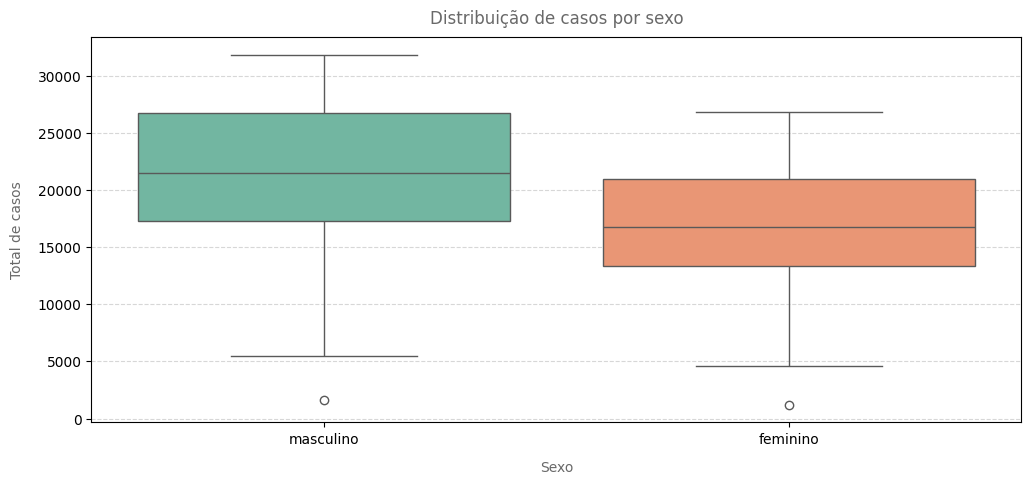

In [62]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df_sexo, x='sexo', y='casos', hue='sexo', palette='Set2')
plt.title("Distribuição de casos por sexo", pad=10, color='dimgrey')
plt.xlabel('Sexo', labelpad=10, color='dimgrey')
plt.ylabel('Total de casos', labelpad=10, color='dimgrey')
plt.grid(axis='y', linestyle='--', alpha=0.5)


**Masculino**

- Mediana de casos ligeiramente maior que no feminino

- Amplitude (dispersão dos dados) maior, com valores chegando a mais de 30.000 casos

- A caixa (IQR) mostra que há grande variação nos dados — ou seja, alguns registros com número muito alto de casos

**Feminino**

- Mediana mais baixa, mas ainda próxima da masculina

- Amplitude total dos dados vai até cerca de 27.000 casos

- A caixa é ligeiramente menor, sugerindo menos variabilidade nos registros femininos

Então homens tendem a ter mais casos registrados, com maior variação. no entanto, a diferença não é extremamente grande visualmente e isso bate com seu resultado estatístico de antes:

```Correlação sexo x casos: rho=0.14, p=0.164```

Então a correlação é fraca e não estatisticamente significativa. O boxplot reforça isso visualmente: há diferença, mas ela não é consistente o suficiente para afirmar uma relação clara entre sexo e número de casos.

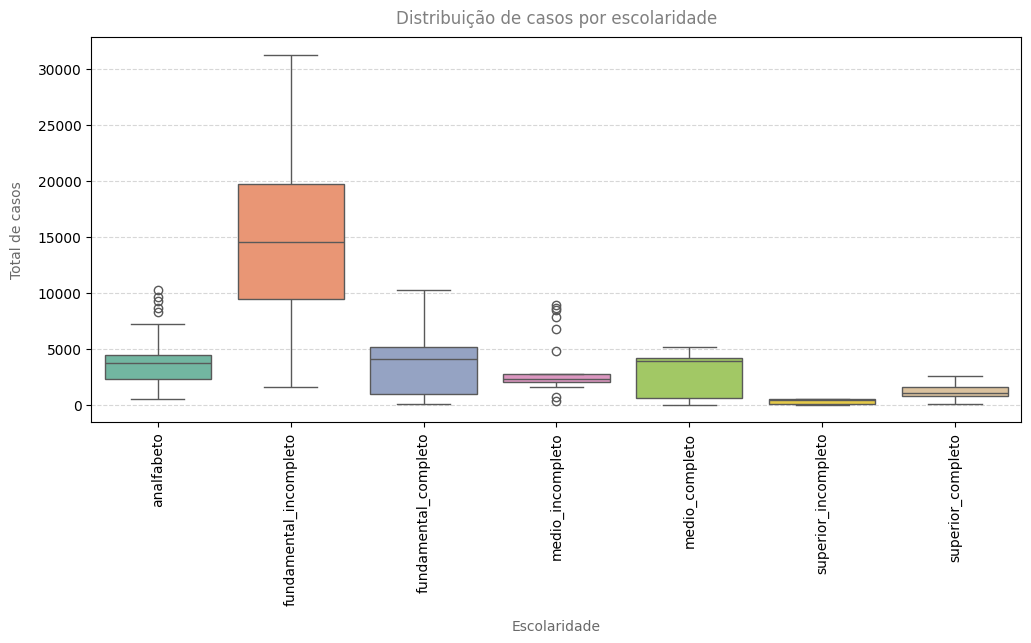

In [63]:
plt.figure(figsize=(12,5))

sns.boxplot(data=df_escolaridade, x='escolaridade', y='casos', hue='escolaridade', palette='Set2')
plt.title("Distribuição de casos por escolaridade", pad=10, color='grey')
plt.xlabel('Escolaridade', labelpad=10, color='dimgrey')
plt.ylabel('Total de casos', labelpad=10, color='dimgrey')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)

**Maior concentração de casos**

A categoria Fundamental Incompleto tem a maior mediana de casos, a maior dispersão dos dados e alguns valores muito altos. Isso indica que pessoas com ensino fundamental incompleto são as mais afetadas, ou as mais diagnosticadas nos registros, possivelmente por condições sociais associadas.

**Alfabetização baixa (analfabeto e fundamental completo)**

Também apresentam medianas elevadas. A categoria Analfabeto mostra casos frequentes, mas com menos variabilidade que Fundamental Incompleto.

**Ensino médio**

Médio incompleto e Médio Completo têm medianas menores, mas ainda expressivas. Ainda assim, aparecem menos que os níveis mais baixos

**Ensino superior**

Superior incompleto e Superior Completo têm baixíssima mediana, baixa dispersão e quase nenhum caso em muitos anos. Reflete que pessoas com ensino superior têm menos registros de hanseníase, o que pode estar ligado ao maior acesso à informação e ao sistema de saúde.

### **Conclusão das Análises**

A análise dos dados de hanseníase no Brasil revela padrões importantes que sugerem desigualdades sociais na distribuição dos casos da doença. A escolaridade tem um impacto visível nos casos de hanseníase, com altas concentrações de casos em níveis mais baixos de escolaridade e redução progressiva dos casos conforme o nível de instrução aumenta. Observou-se que indivíduos com ensino fundamental incompleto concentram o maior número de registros, com alta mediana e grande dispersão dos dados. Além disso, pessoas analfabetas e com fundamental completo também apresentam medianas elevadas, indicando que a baixa escolaridade está associada a maior incidência de hanseníase.

Quando analisamos os casos por idade, o maior número de diagnósticos esta nos indivíduos com faixa etária de 20-49 anos. São pessoas que estão numa fase economicamente ativas, o que pode trazer maior risco de contato com a doença.

No recorte por raça, a população parda apresentou a maior mediana de casos e a maior variação nos dados, seguida pela população branca. Já os grupos preto, amarelo e indígena tiveram medianas mais baixas, sendo que os dados dos indígenas são especialmente baixos, possivelmente por subnotificação ou dificuldades de acesso aos serviços de saúde. A correlação entre raça e casos, embora fraca, foi estatisticamente significativa, indicando que a questão racial pode refletir vulnerabilidades sociais que impactam o diagnóstico e tratamento da hanseníase.

Quanto ao sexo, os homens apresentaram ligeira predominância no número de casos, com maior dispersão dos dados e presença de valores extremos. No entanto, a correlação entre sexo e casos foi fraca e não significativa, o que sugere que não há evidência estatística suficiente para afirmar que há diferença consistente entre homens e mulheres na incidência da doença.

De forma geral, os resultados sugerem que a hanseníase ainda está fortemente ligada a condições socioeconômicas, afetando de forma mais intensa populações com menor escolaridade e raças historicamente marginalizadas. Essas desigualdades devem ser consideradas no planejamento de políticas públicas voltadas à prevenção, diagnóstico e tratamento, priorizando o acesso à saúde para grupos vulneráveis.